<a href="https://colab.research.google.com/github/arintaabiaksa-del/multiclass-obesity-prediction-ann/blob/main/klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instal Package & Import libraries

In [ ]:
!pip install scikeras

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import warnings
import random
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import confusion_matrix

# Load Dataset

In [ ]:
df = pd.read_csv('/content/ObesityDataSet 2.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# EDA


## Check and Handle Duplicate

In [ ]:
#cek dplicate
df.duplicated().sum()

np.int64(24)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

## Check and Handle Missing Value

In [ ]:
#cek missing value
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

## Distribution of Target

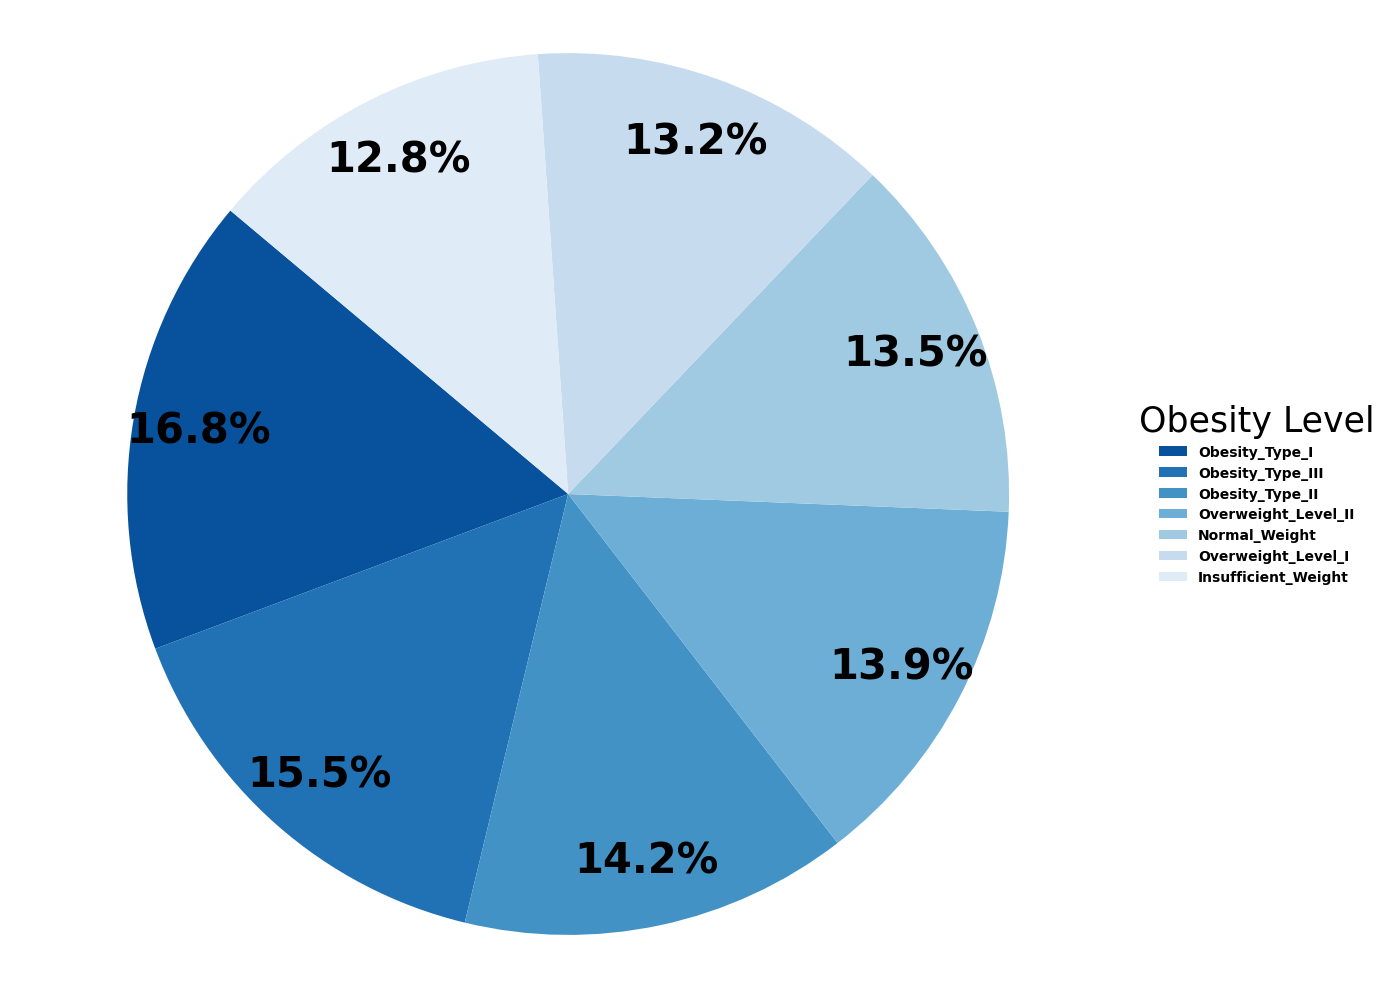

In [ ]:
class_counts_original = df['NObeyesdad'].value_counts()

# Define a blue color palette with gradients
# You can pick specific colors or use a diverging/sequential colormap from matplotlib/seaborn
blue_palette = sns.color_palette("Blues_r", n_colors=len(class_counts_original))

plt.figure(figsize=(14, 10)) # Adjust figure size to accommodate larger fonts and legend
plt.pie(class_counts_original, autopct='%1.1f%%', startangle=140, pctdistance=0.85, textprops={'fontsize': 30, 'fontweight': 'bold'}, colors=blue_palette) # Increased font size for percentages and added blue palette
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend outside the chart with increased font size
plt.legend(class_counts_original.index, title="Obesity Level", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=20, title_fontsize=25, frameon=False, prop={'weight':'bold'}) # Added fontweight to legend
plt.tight_layout() # Adjust layout to prevent legend from overlapping
plt.show()

## Numeric col Skewness

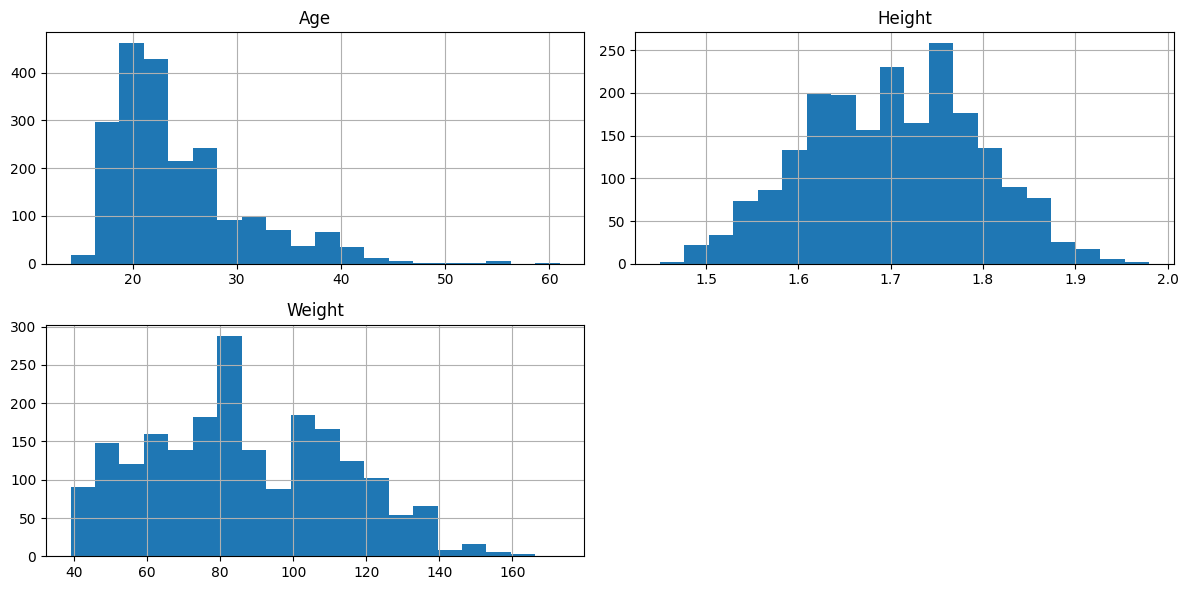

In [ ]:
numeric_cols = ['Age', 'Height', 'Weight',]
df[numeric_cols].hist(bins=20, figsize=(12,6))
plt.tight_layout()
plt.show()

## Distribution of Categorical features

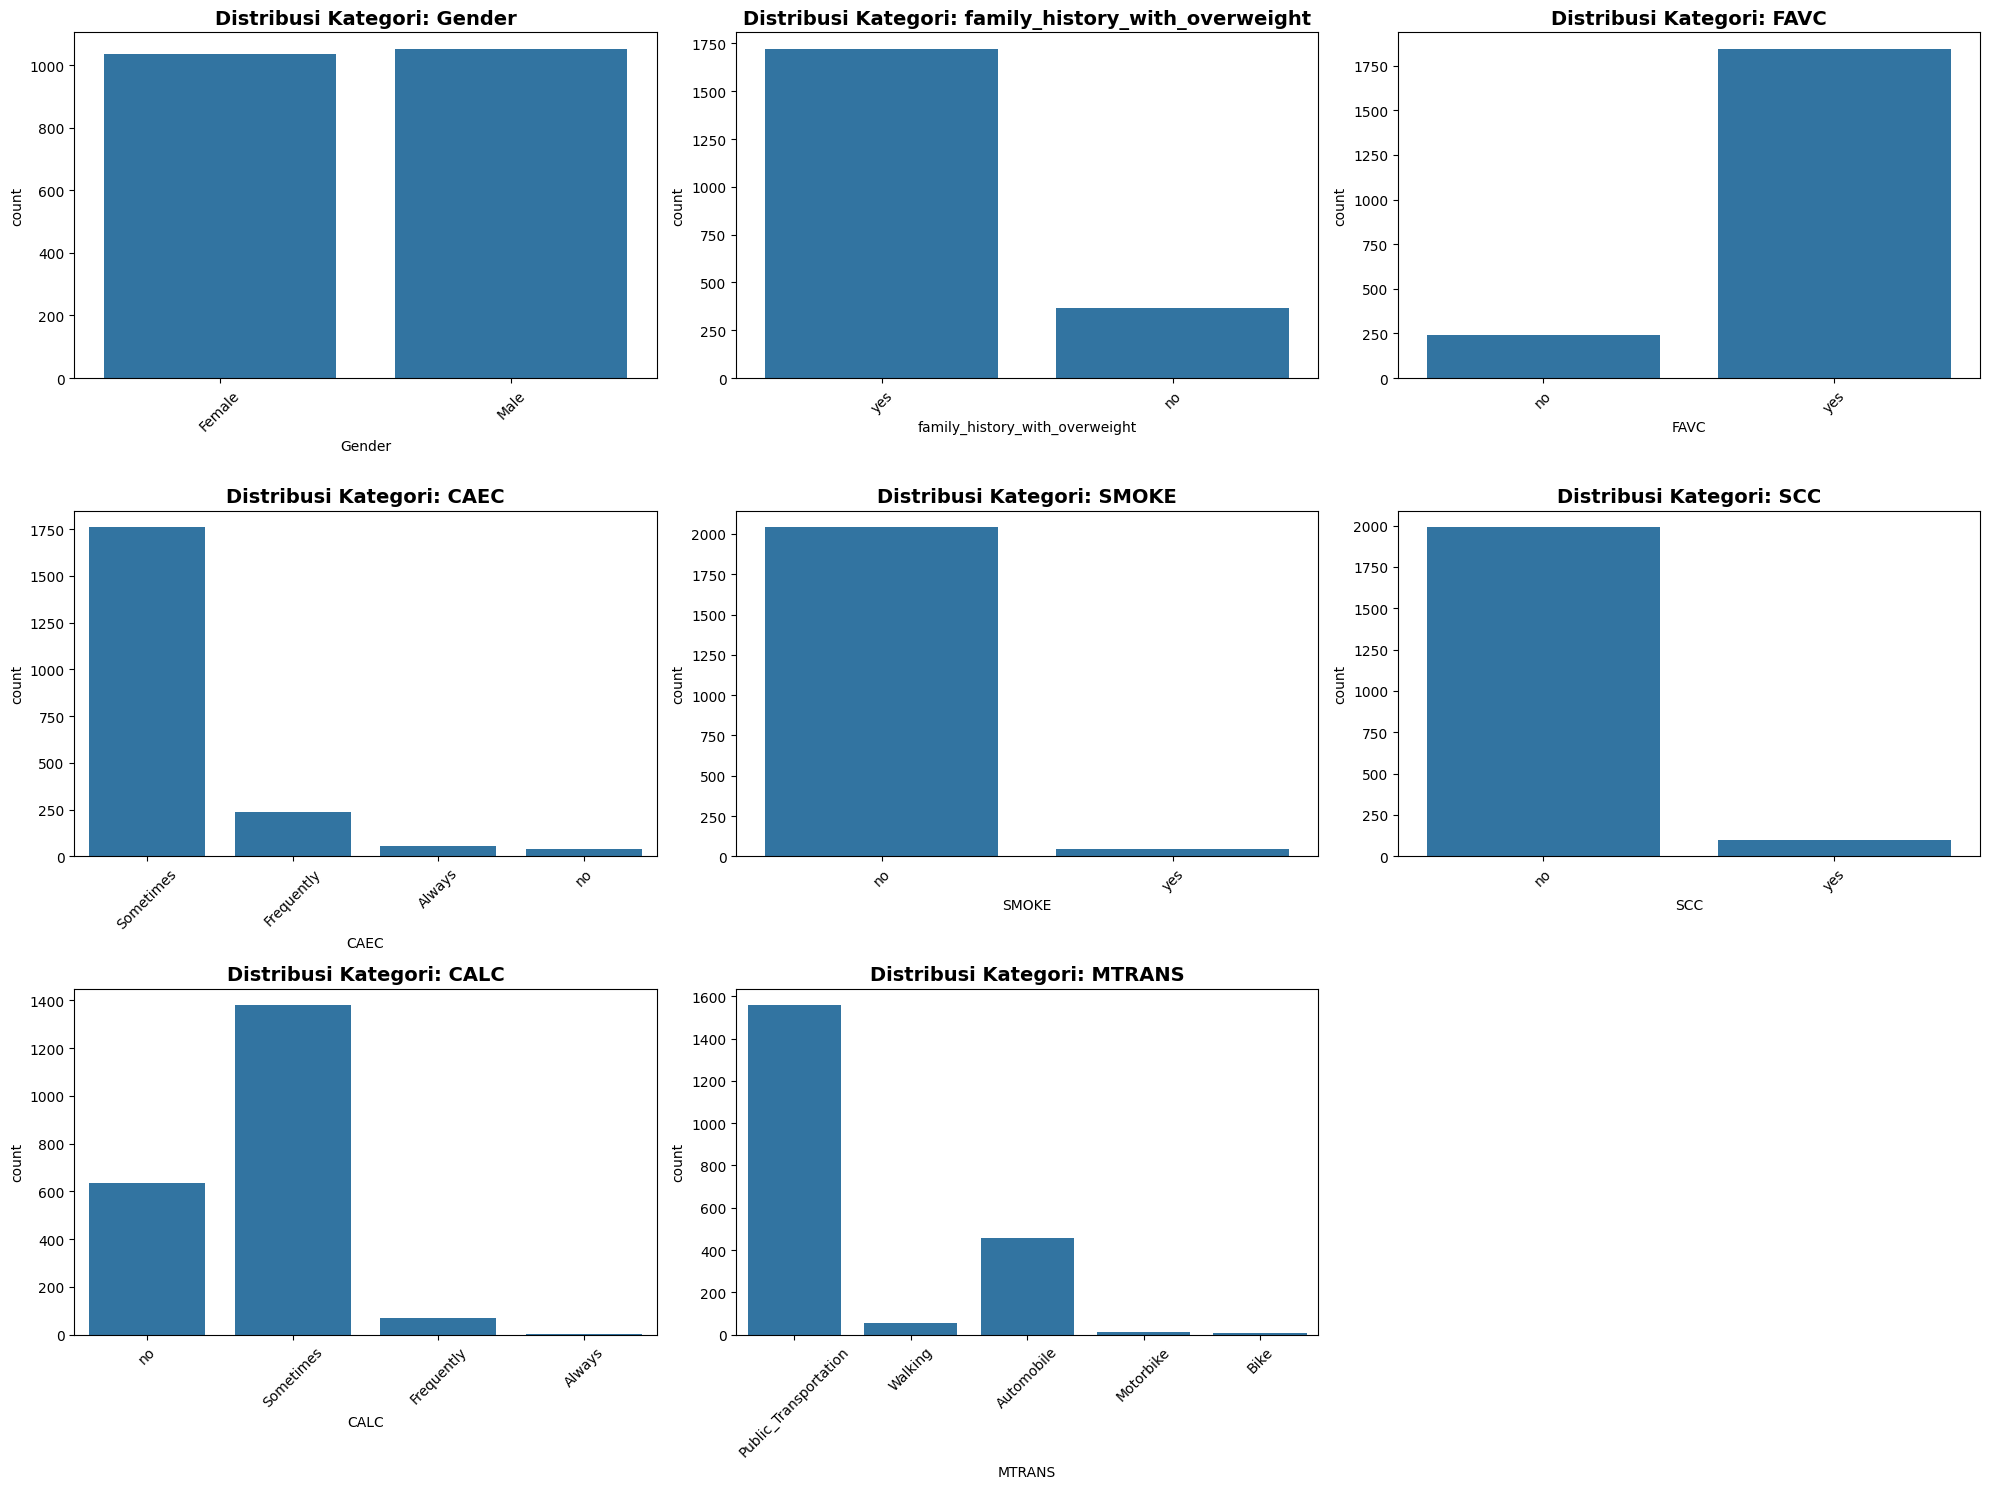

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar fitur kategorik (sesuai data Anda)
categorical_cols = [
    "Gender",
    "family_history_with_overweight",
    "FAVC",
    "CAEC",
    "SMOKE",
    "SCC",
    "CALC",
    "MTRANS"
]

# Jumlah kolom subplot
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribusi Kategori: {col}", fontsize=14, weight="bold")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.tight_layout()

plt.show()


## Correlation Numerical Features

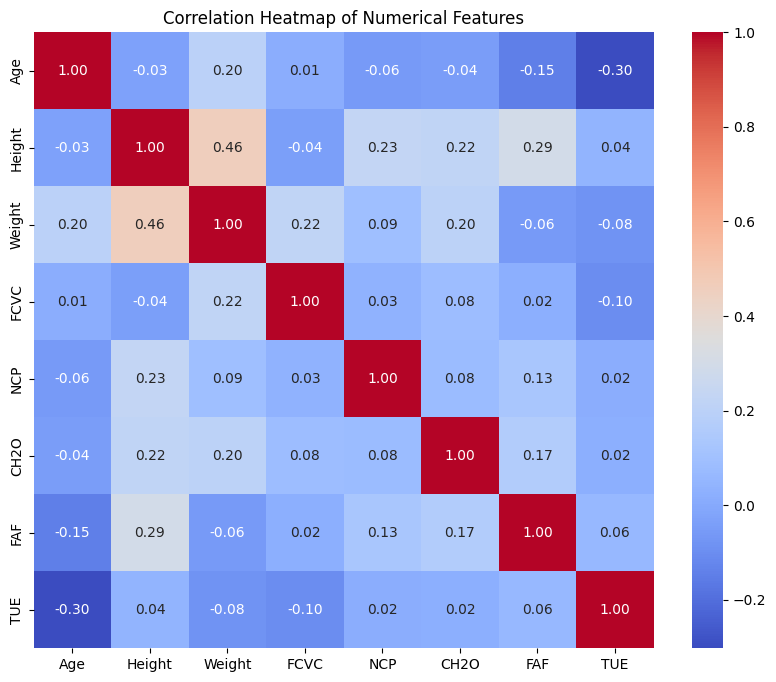

In [ ]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
## Outlier Checking and Handling

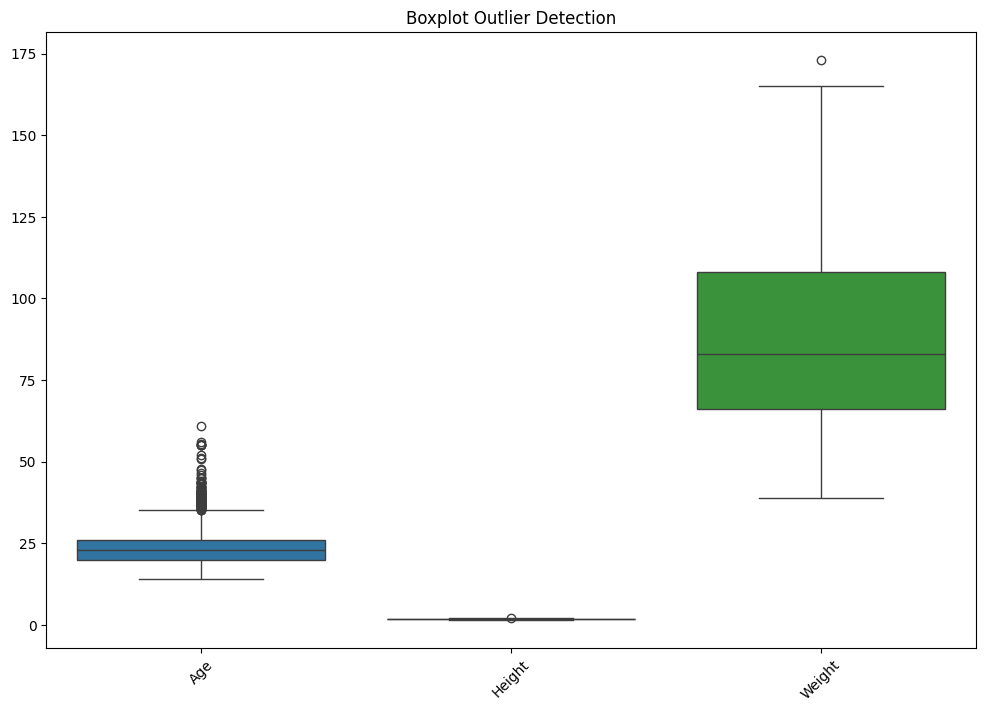

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Age', 'Height', 'Weight']
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Outlier Detection")
plt.show()


# Data Preprocessing

## Categorical Features Encoding

In [ ]:
label_encoders = {}
for col in categorical_cols:
    if col != 'NObeyesdad':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

## Target Encoding

In [ ]:
target_encoder = LabelEncoder()
df['NObeyesdad_encoded'] = target_encoder.fit_transform(df['NObeyesdad'])

## Data Splitting

In [ ]:
X = df.drop(['NObeyesdad', 'NObeyesdad_encoded'], axis=1)
y = df['NObeyesdad_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

Numerical Features Scalling

In [ ]:
scaler = StandardScaler()
numeric_cols = ['Age', 'Height', 'Weight']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,NObeyesdad_encoded
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight,24.386526,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight,24.238227,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight,23.765432,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I,26.851852,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II,28.342381,6


# Data Processing

## Build model

In [87]:
seed = 69
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [88]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

tf.keras.backend.clear_session()

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),

    Dense(64, activation='relu'),

    Dense(32, activation='relu'),

    Dense(7, activation='softmax') # Changed from 3 to 7 to match number of classes
])



# Tampilkan ringkasan arsitektur model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,871 (50.28 KB)

 Trainable params: 12,871 (50.28 KB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [89]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# 1. Kompilasi model
tf.keras.backend.clear_session()
model.compile(
    optimizer=Adam(learning_rate= 0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model berhasil dikompilasi.")

es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Tentukan parameter pelatihan
EPOCHS = 50
BATCH_SIZE = 32

# 1. Latih Model
history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=1,
)

print("\nPelatihan model selesai.")

Model berhasil dikompilasi.
Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2771 - loss: 1.8103 - val_accuracy: 0.3373 - val_loss: 1.5016
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4387 - loss: 1.3896 - val_accuracy: 0.5574 - val_loss: 1.1409
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6213 - loss: 1.0467 - val_accuracy: 0.6699 - val_loss: 0.8618
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6942 - loss: 0.8221 - val_accuracy: 0.7273 - val_loss: 0.6942
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7497 - loss: 0.6835 - val_accuracy: 0.7919 - val_loss: 0.5771
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7957 - loss: 0.5798 - val_accuracy: 0.8206 - val_loss: 0.4983
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8292 - loss: 0.5035 - val_accuracy: 0.8541 - val_loss: 0.4337
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8553 - loss: 0.4380 - val_

## Evaluate Model

In [90]:
test_loss, test_accuracy = model.evaluate(
    X_test,
    y_test,
    verbose=1
)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9830 - loss: 0.0643 


In [91]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 1. Evaluasi pada data test
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nEvaluasi pada data Test:")
print(f"  Loss: {loss:.4f}")
print(f"  Accuracy: {accuracy:.4f}")

# 2. Prediksi probabilitas
y_pred_probs = model.predict(X_test)

# 3. Ubah probabilitas menjadi kelas prediksi (indeks kelas dengan probabilitas tertinggi)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# 4. Tampilkan Classification Report (penting untuk data tidak seimbang)
print("\nClassification Report:")
# y_temp_test adalah label asli (sebelum OHE)
print(classification_report(y_test, y_pred_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9830 - loss: 0.0643

Evaluasi pada data Test:
  Loss: 0.0589
  Accuracy: 0.9833
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.97      1.00      0.98        57
           2       1.00      0.99      0.99        70
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        65
           5       0.95      0.96      0.95        55
           6       0.96      0.95      0.96        58

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Make predictions with the model without dropout
y_pred_probs_no_dropout = model.predict(X_test)
y_pred_classes_no_dropout = np.argmax(y_pred_probs_no_dropout, axis=1)

# Overall Accuracy (from previous evaluation of 'model')
overall_accuracy_no_dropout = test_accuracy # 'test_accuracy' variable holds the accuracy for 'model'

# Overall Precision (weighted average)
overall_precision_no_dropout = precision_score(y_test, y_pred_classes_no_dropout, average='weighted')

# Overall Recall (weighted average)
overall_recall_no_dropout = recall_score(y_test, y_pred_classes_no_dropout, average='weighted')

# Overall F1-Score (weighted average)
overall_f1_score_no_dropout = f1_score(y_test, y_pred_classes_no_dropout, average='weighted')

print(f"\nOverall Metrics for the model without dropout:")
print(f"  Accuracy: {overall_accuracy_no_dropout:.4f}")
print(f"  Precision (weighted): {overall_precision_no_dropout:.4f}")
print(f"  Recall (weighted): {overall_recall_no_dropout:.4f}")
print(f"  F1-Score (weighted): {overall_f1_score_no_dropout:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Overall Metrics for the model without dropout:
  Accuracy: 0.9833
  Precision (weighted): 0.9835
  Recall (weighted): 0.9833
  F1-Score (weighted): 0.9833


# Confution Matrix

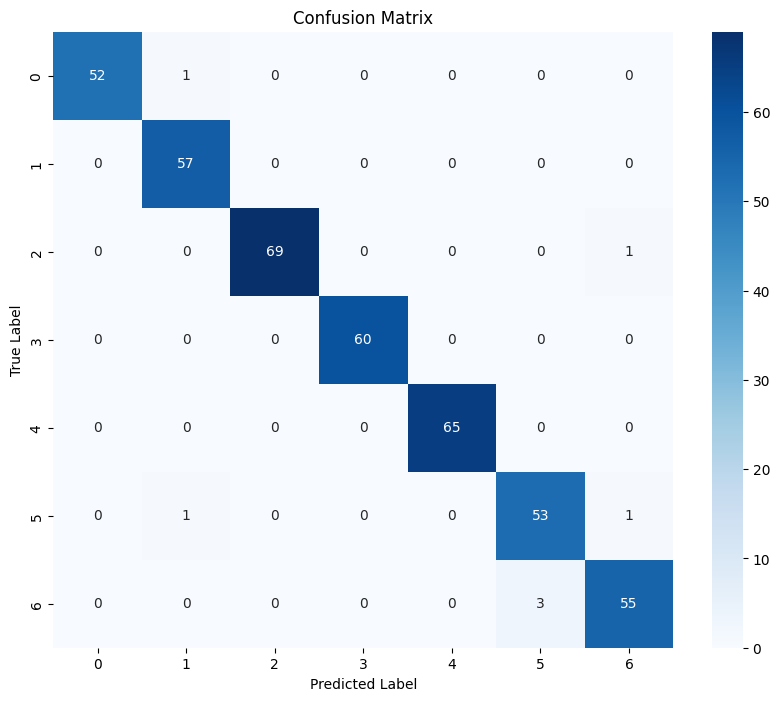

In [93]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Build Model with Dropout


In [94]:
seed = 69
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [95]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.keras.backend.clear_session()

model_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
Dropout(0.5),
    Dense(64, activation='relu'),
Dropout(0.5),
    Dense(32, activation='relu'),
Dropout(0.5),
    Dense(7, activation='softmax') # Changed from 3 to 7 to match number of classes
])



# Tampilkan ringkasan arsitektur model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,615 (150.84 KB)

 Trainable params: 12,871 (50.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,744 (100.57 KB)

## Training Model with Dropout


In [96]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# 1. Kompilasi model
tf.keras.backend.clear_session()
model_dropout.compile(
    optimizer=Adam(learning_rate= 0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model berhasil dikompilasi.")

es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Tentukan parameter pelatihan
EPOCHS = 50
BATCH_SIZE = 32

# 1. Latih Model
history = model_dropout.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=1,
)

print("\nPelatihan model selesai.")

Model berhasil dikompilasi.
Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1567 - loss: 4.6405 - val_accuracy: 0.2464 - val_loss: 1.9395
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1465 - loss: 2.2179 - val_accuracy: 0.2033 - val_loss: 1.9387
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1389 - loss: 2.0672 - val_accuracy: 0.2536 - val_loss: 1.9344
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1834 - loss: 1.9716 - val_accuracy: 0.2823 - val_loss: 1.9209
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1777 - loss: 1.9340 - val_accuracy: 0.2847 - val_loss: 1.8819
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1946 - loss: 1.9038 - val_accuracy: 0.3038 - val_loss: 1.8156
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2043 - loss: 1.8881 - val_accuracy: 0.2871 - val_loss: 1.7813
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2443 - loss: 1.8316 - val

## Evaluate Model with Dropout


In [97]:
test_loss, test_accuracy = model_dropout.evaluate(
    X_test,
    y_test,
    verbose=1
)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9373 - loss: 0.3649 


In [101]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 1. Evaluasi pada data test
loss, accuracy = model_dropout.evaluate(X_test, y_test, verbose=1)
print(f"\nEvaluasi pada data Test:")
print(f"  Loss: {loss:.4f}")
print(f"  Accuracy: {accuracy:.4f}")

# 2. Prediksi probabilitas
y_pred_probs_drop = model_dropout.predict(X_test)

# 3. Ubah probabilitas menjadi kelas prediksi (indeks kelas dengan probabilitas tertinggi)
y_pred_classes_drop = np.argmax(y_pred_probs_drop, axis=1)

# 4. Tampilkan Classification Report (penting untuk data tidak seimbang)
print("\nClassification Report:")
# y_temp_test adalah label asli (sebelum OHE)
print(classification_report(y_test, y_pred_classes_drop))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9373 - loss: 0.3649 

Evaluasi pada data Test:
  Loss: 0.3635
  Accuracy: 0.9354
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        53
           1       0.98      0.72      0.83        57
           2       0.97      0.97      0.97        70
           3       1.00      0.98      0.99        60
           4       1.00      1.00      1.00        65
           5       0.90      0.95      0.92        55
           6       0.93      0.91      0.92        58

    accuracy                           0.94       418
   macro avg       0.94      0.93      0.93       418
weighted avg       0.94      0.94      0.93       418



In [105]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# The variables y_test and y_pred_classes are already available from the evaluation of model_dropout
# test_accuracy is also available from model_dropout.evaluate

# Overall Accuracy
overall_accuracy = test_accuracy

# Overall Precision (weighted average)
overall_precision = precision_score(y_test, y_pred_classes_drop, average='weighted')

# Overall Recall (weighted average)
overall_recall = recall_score(y_test, y_pred_classes_drop, average='weighted')

# Overall F1-Score (weighted average)
overall_f1_score = f1_score(y_test, y_pred_classes_drop, average='weighted')

print(f"\nOverall Metrics for the model with dropout:")
print(f"  Accuracy: {overall_accuracy:.4f}")
print(f"  Precision (weighted): {overall_precision:.4f}")
print(f"  Recall (weighted): {overall_recall:.4f}")
print(f"  F1-Score (weighted): {overall_f1_score:.4f}")


Overall Metrics for the model with dropout:
  Accuracy: 0.9354
  Precision (weighted): 0.9421
  Recall (weighted): 0.9354
  F1-Score (weighted): 0.9345


## Confussion Matrix


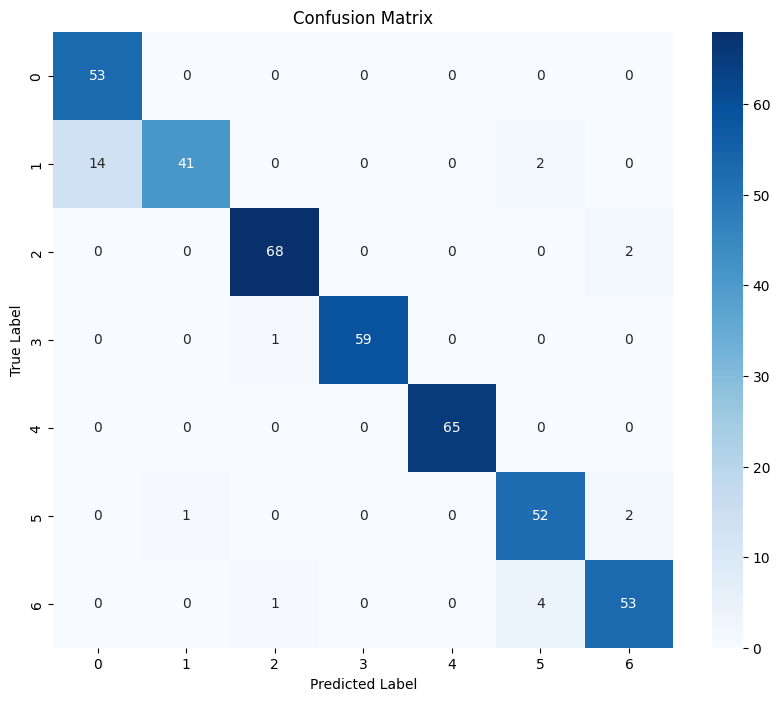

In [106]:
cm = confusion_matrix(y_test, y_pred_classes_drop)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import os
import pandas as pd # Ensure pandas is imported if not already

if not os.path.exists('weights_csv'):
    os.makedirs('weights_csv')

# Get feature names for the input layer
input_feature_names = X_train.columns.tolist()

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()

    if len(weights) > 0:  # Only process layers with trainable weights (e.g., Dense layers)
        W, b = weights

        # Determine column and index names for weights
        if i == 0:  # First Dense layer
            # W shape: (input_features, num_neurons_in_layer)
            # Rows of df_W are input features, columns are output neurons of this layer
            weight_df = pd.DataFrame(W, index=input_feature_names, columns=[f'Neuron_{j+1}_Layer{i}' for j in range(W.shape[1])])
        else:
            # For subsequent dense layers, inputs are from previous layer's neurons
            # Rows of df_W are previous layer's neurons, columns are current layer's neurons
            weight_df = pd.DataFrame(W, index=[f'Neuron_{j+1}_Layer{i-1}_input' for j in range(W.shape[0])], columns=[f'Neuron_{k+1}_Layer{i}' for k in range(W.shape[1])])

        # Save weights to CSV
        weight_df.to_csv(f"weights_csv/layer_{i}_{layer.name}_weights.csv") # pandas writes index by default, so no index=False

        # Create DataFrame for biases with descriptive column names
        bias_df = pd.DataFrame(b.reshape(1, -1), columns=[f'Bias_Neuron_{j+1}_Layer{i}' for j in range(b.shape[0])])

        # Save biases to CSV
        bias_df.to_csv(f"weights_csv/layer_{i}_{layer.name}_bias.csv", index=False)

        print(f"Layer {layer.name} (Layer {i}) weights and biases exported successfully.")

print("All relevant weights and biases have been exported with descriptive column names.")

Layer dense (Layer 0) weights and biases exported successfully.
Layer dense_1 (Layer 1) weights and biases exported successfully.
Layer dense_2 (Layer 2) weights and biases exported successfully.
Layer dense_3 (Layer 3) weights and biases exported successfully.
All relevant weights and biases have been exported with descriptive column names.


In [ ]:
for layer in model_dropout.layers:
    print(layer.name)
    print(layer.get_weights())
    print("-----------------------")


dense
[array([[-0.03023698,  0.13096263,  0.06330724, ...,  0.35053277,
        -0.23880777, -0.82991916],
       [-0.02894624, -0.09622382,  0.06188531, ...,  0.2629972 ,
         0.25297895, -0.15026313],
       [-0.15107211, -0.06450914, -0.07643807, ...,  0.19935925,
         0.06958811, -0.20361559],
       ...,
       [-0.06158468,  0.11129741, -0.05985251, ...,  0.12102223,
         0.05863861, -0.30835184],
       [-0.07834681, -0.09178355,  0.13636138, ..., -0.0212784 ,
        -0.21301982, -0.01813407],
       [ 0.03109654, -0.15652038, -0.14671367, ...,  0.01110407,
         0.03314027,  0.06595922]], dtype=float32), array([-0.18862297,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.23314182, -0.17265585, -0.21505538,  0.        ,
       -0.23144977,  0.        , -0.22671875,  0.        ,  0.        ,
       -0.18472196,  0.0348701 ,  0.        , -0.03511188,  0.        ,
        0.        , -0.19140063,  0.        ,  0.02608092,  0.16973567,
    